In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/extrovert-vs-introvert-behavior-data/personality_dataset.csv


# DATA LOADING AND PREPROCESSING

In [2]:
df = pd.read_csv('/kaggle/input/extrovert-vs-introvert-behavior-data/personality_dataset.csv')

In [3]:
df

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert
...,...,...,...,...,...,...,...,...
2895,3.0,No,7.0,6.0,No,6.0,6.0,Extrovert
2896,3.0,No,8.0,3.0,No,14.0,9.0,Extrovert
2897,4.0,Yes,1.0,1.0,Yes,4.0,0.0,Introvert
2898,11.0,Yes,1.0,NaN,Yes,2.0,0.0,Introvert


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


In [5]:
df.isna().sum()

Time_spent_Alone             63
Stage_fear                   73
Social_event_attendance      62
Going_outside                66
Drained_after_socializing    52
Friends_circle_size          77
Post_frequency               65
Personality                   0
dtype: int64

In [6]:
df_filled = df.copy()

* Function for Removing Nan value presnt in dataset

In [7]:
def fill_missing_values(df):
    df_filled = df.copy()

    for col in df.columns:
        if df[col].dtype == 'float64' or df[col].dtype == 'int64':
            mean_val = df[col].mean().round(4)
            df_filled[col].fillna(mean_val, inplace =True)

        elif df[col].dtype == 'object':
            non_null_values = df[col].dropna().unique()
            num_missing = df[col].isna().sum()


            if num_missing > 0 and len(non_null_values) > 0:
                replacements = np.tile(non_null_values,int(np.ceil(num_missing / len(non_null_values))))
                np.random.shuffle(replacements)
                df_filled.loc[df[col].isna(),col] = replacements[:num_missing]

    return df_filled

In [8]:
df_clean = fill_missing_values(df)
df_clean

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert
...,...,...,...,...,...,...,...,...
2895,3.0,No,7.0,6.0,No,6.0,6.0,Extrovert
2896,3.0,No,8.0,3.0,No,14.0,9.0,Extrovert
2897,4.0,Yes,1.0,1.0,Yes,4.0,0.0,Introvert
2898,11.0,Yes,1.0,3.0,Yes,2.0,0.0,Introvert


In [9]:
df_clean.isna().sum()

Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64

In [10]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2900 non-null   float64
 1   Stage_fear                 2900 non-null   object 
 2   Social_event_attendance    2900 non-null   float64
 3   Going_outside              2900 non-null   float64
 4   Drained_after_socializing  2900 non-null   object 
 5   Friends_circle_size        2900 non-null   float64
 6   Post_frequency             2900 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


In [11]:
data = df_clean

# VIZUALIZATION SECTION

In [12]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [13]:
sns.set_style('whitegrid')

In [14]:
cols = ['Time_spent_Alone', 'Stage_fear', 'Social_event_attendance',
       'Going_outside', 'Drained_after_socializing', 'Friends_circle_size',
       'Post_frequency', 'Personality']

# HISTOGRAM

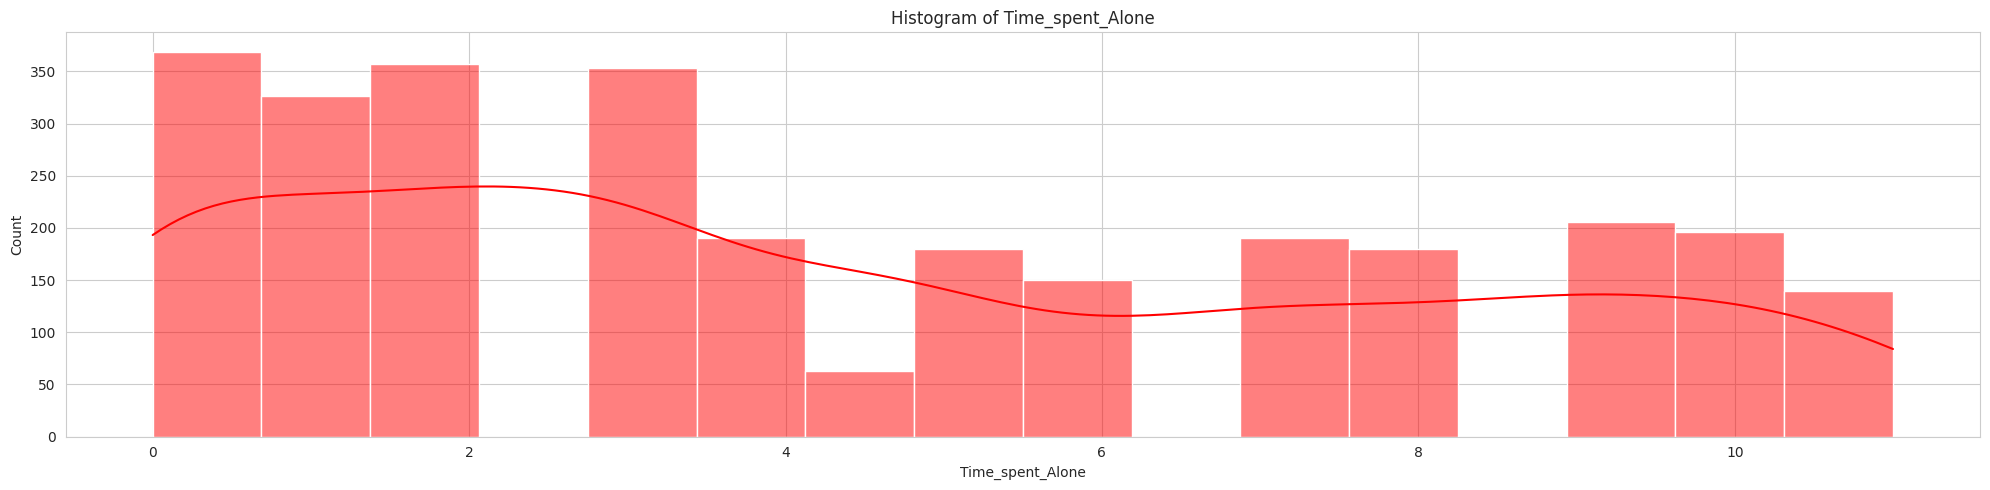

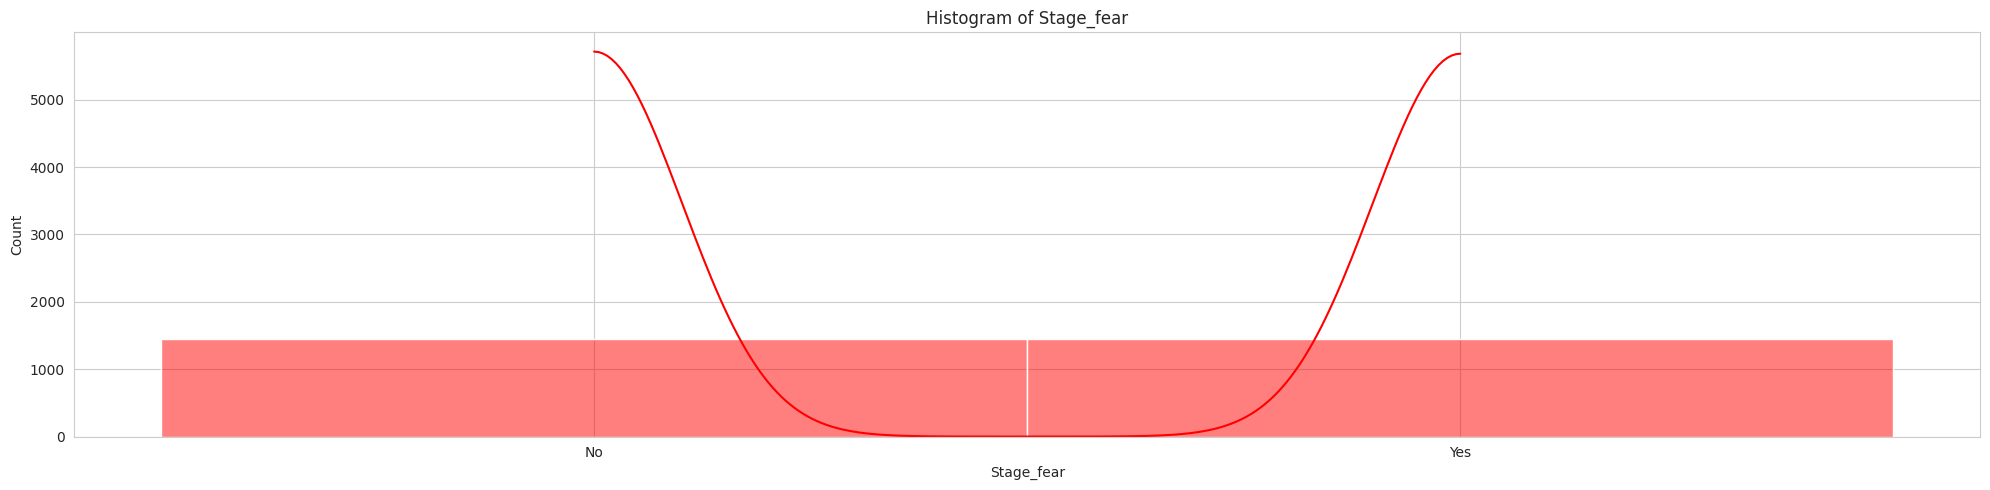

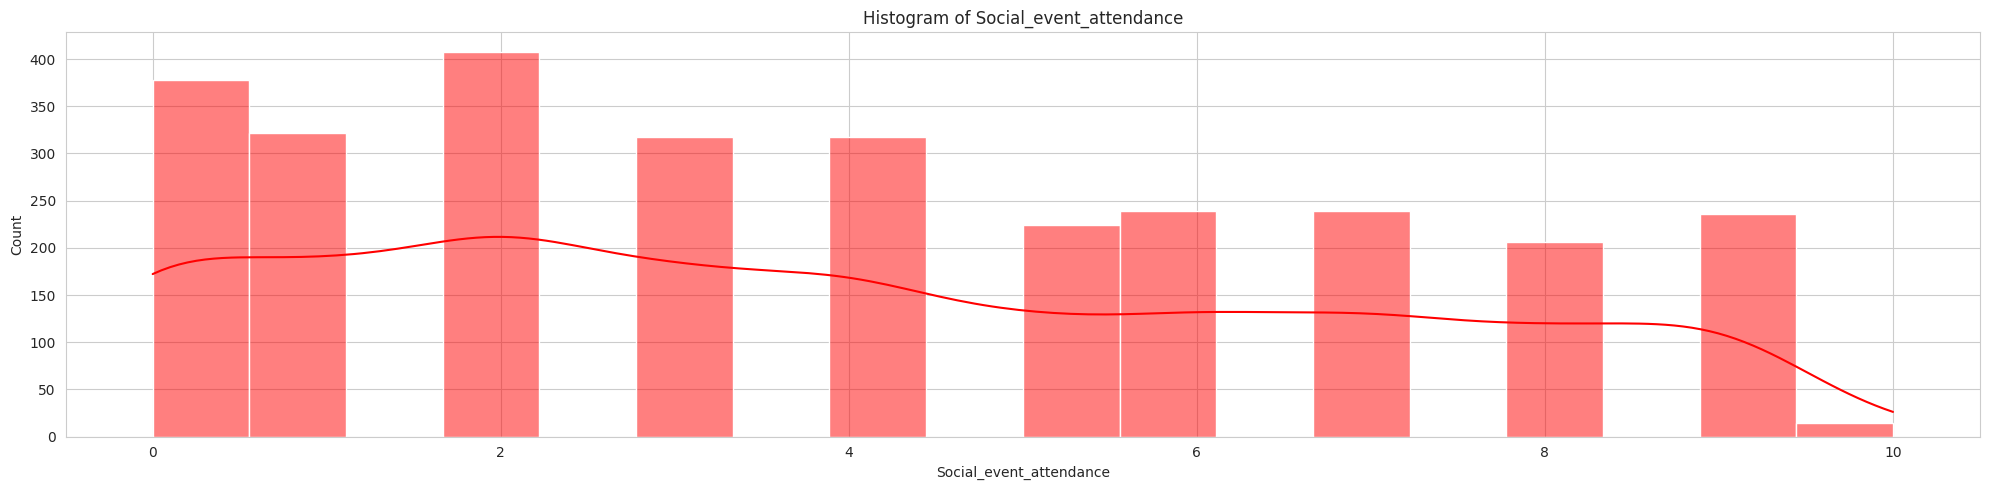

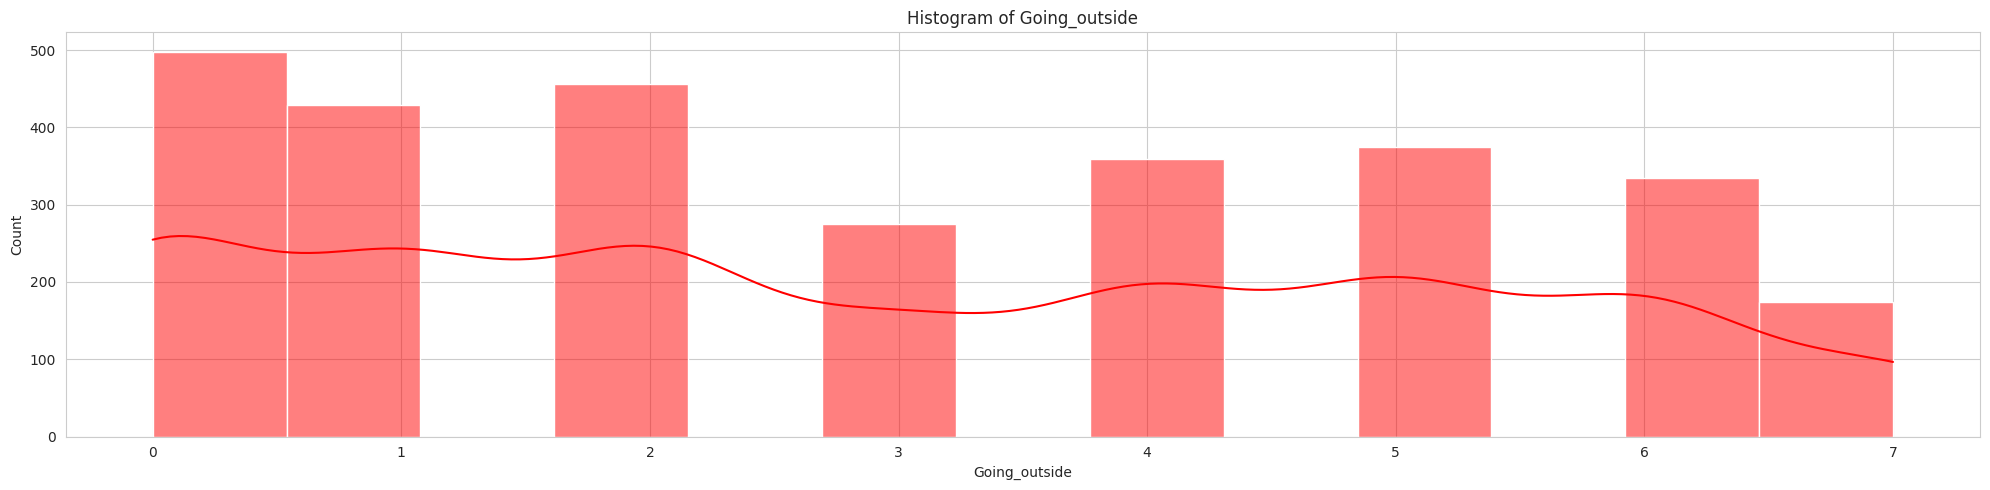

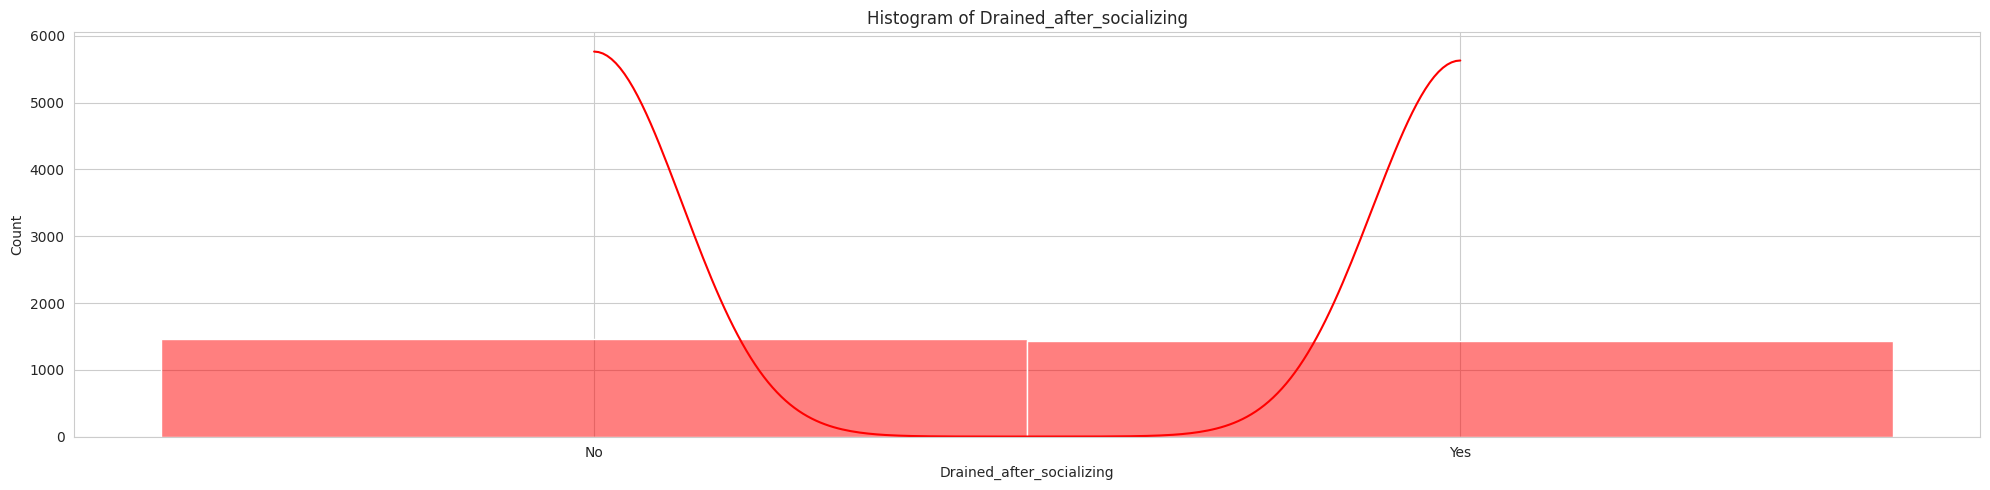

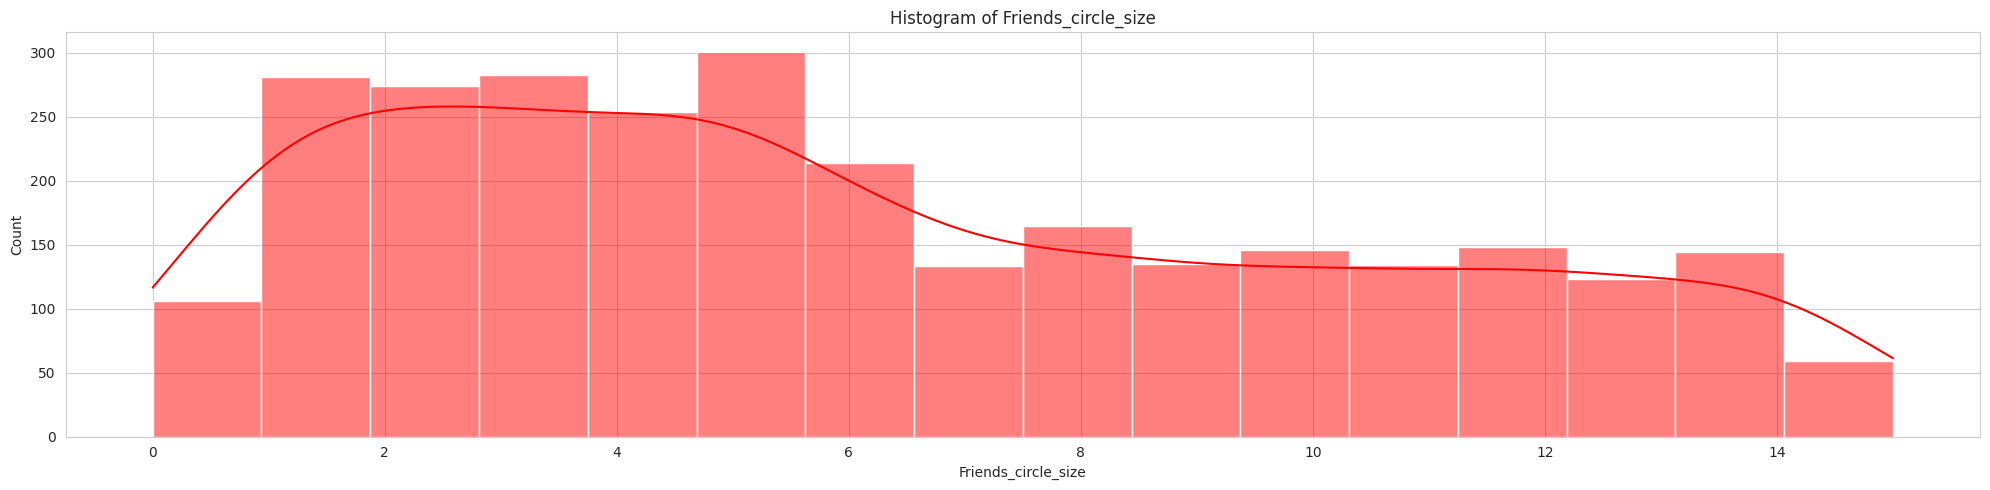

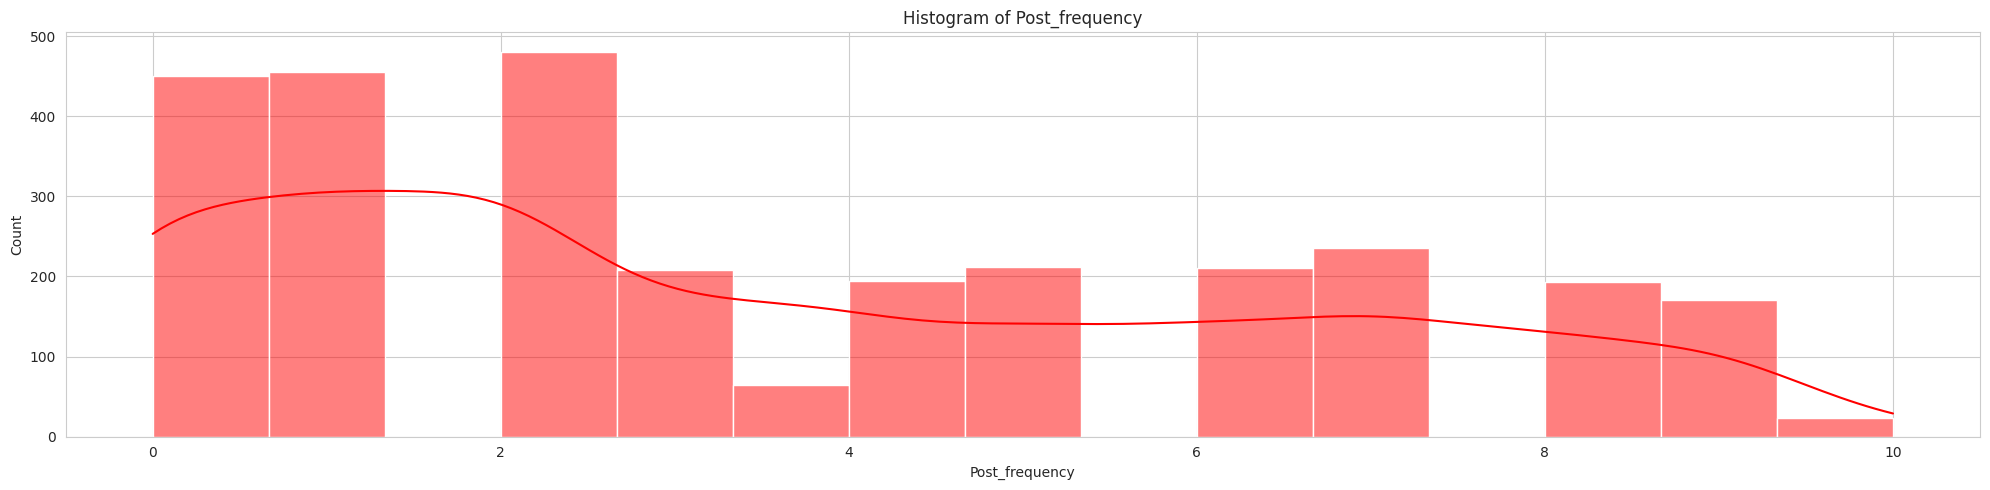

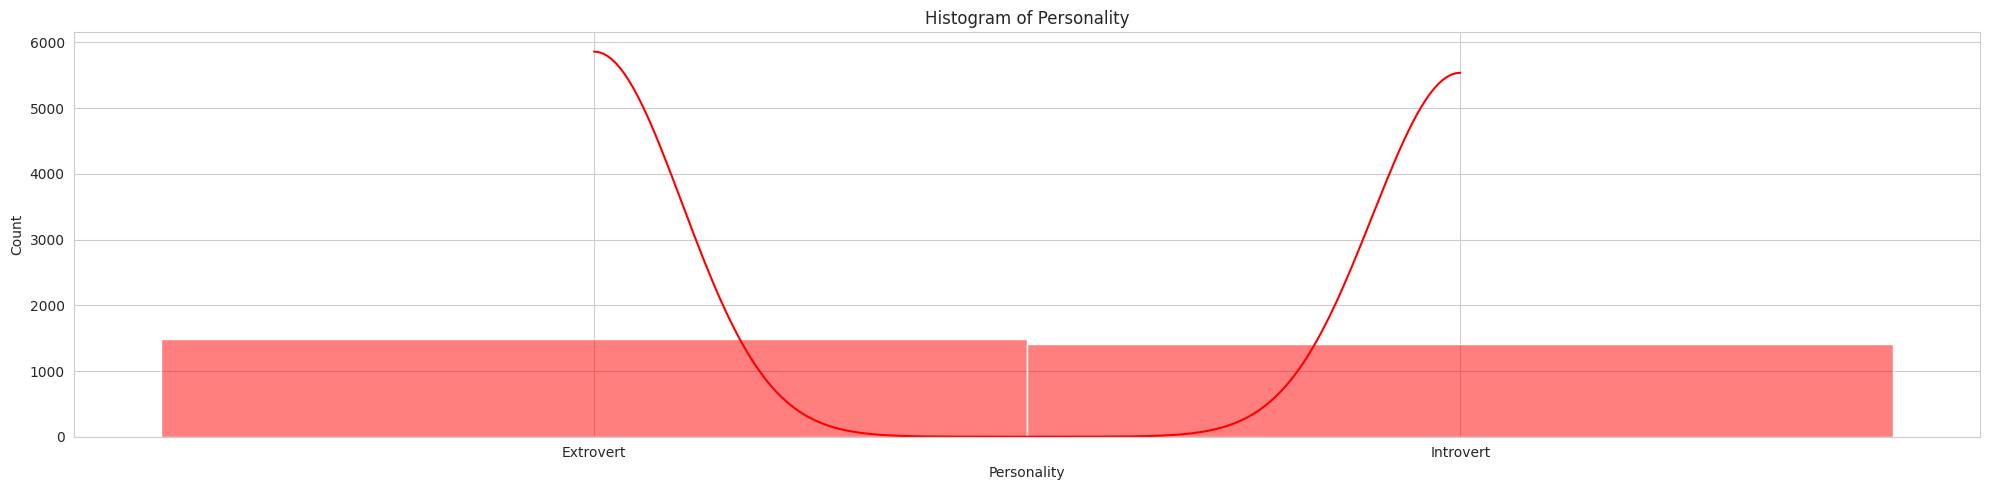

In [15]:
for features in cols:
    if features in data.columns:
        plt.figure(figsize=(20,5))
        sns.histplot(data[features].dropna(),kde=True,color='red')
        plt.title(f"Histogram of {features}")
        plt.tight_layout()
        plt.show()

# COUNT-PLOT

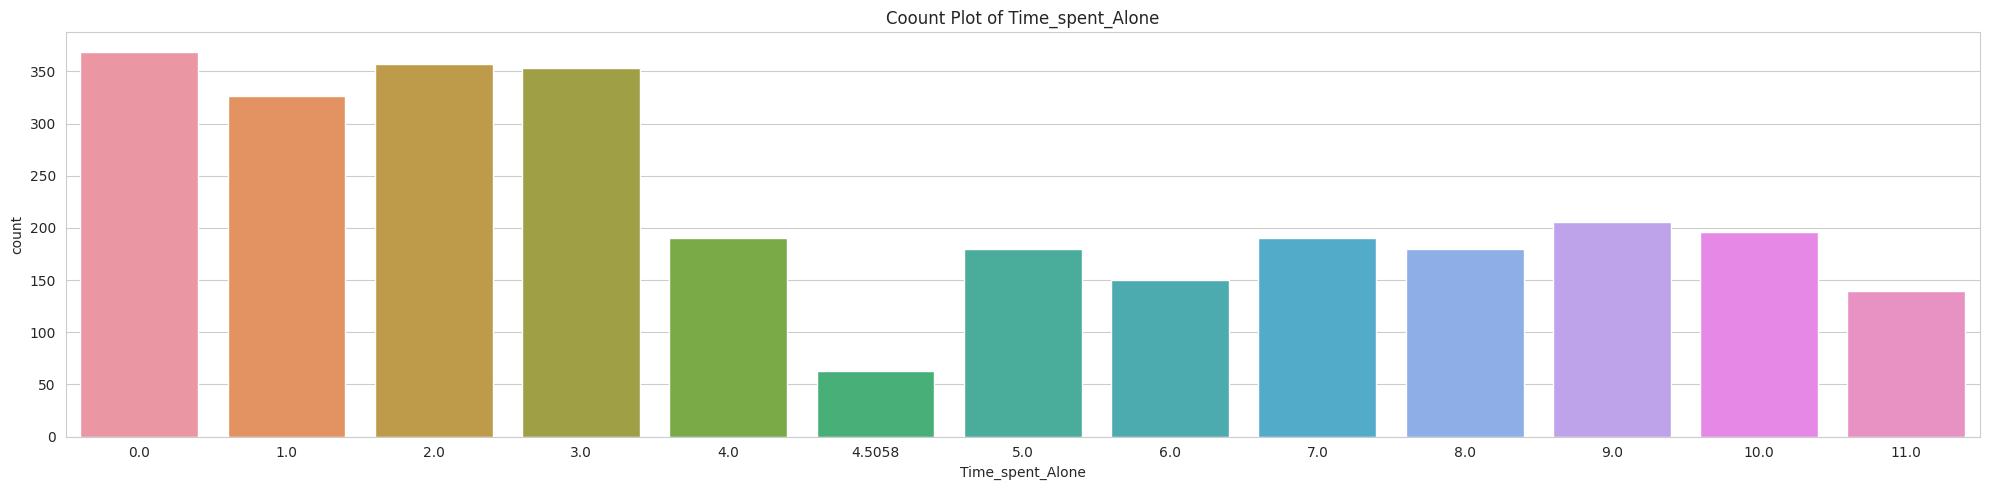

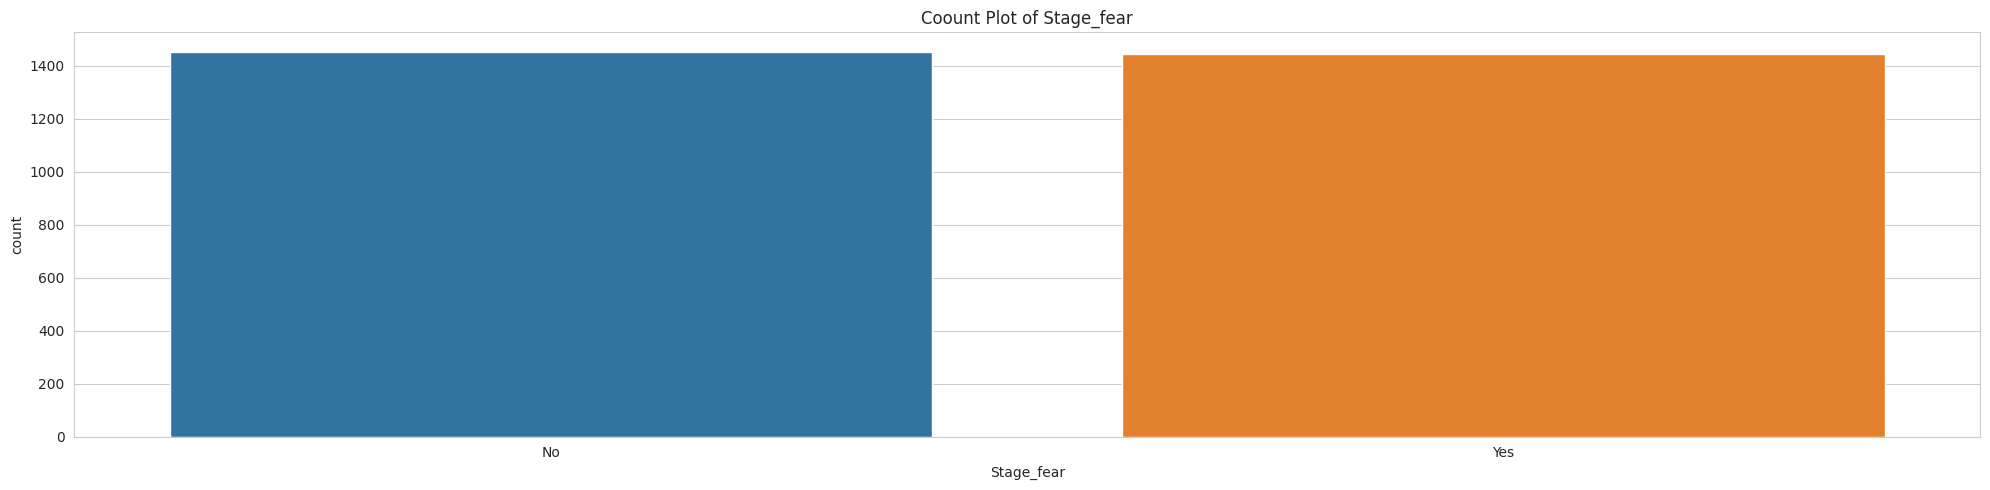

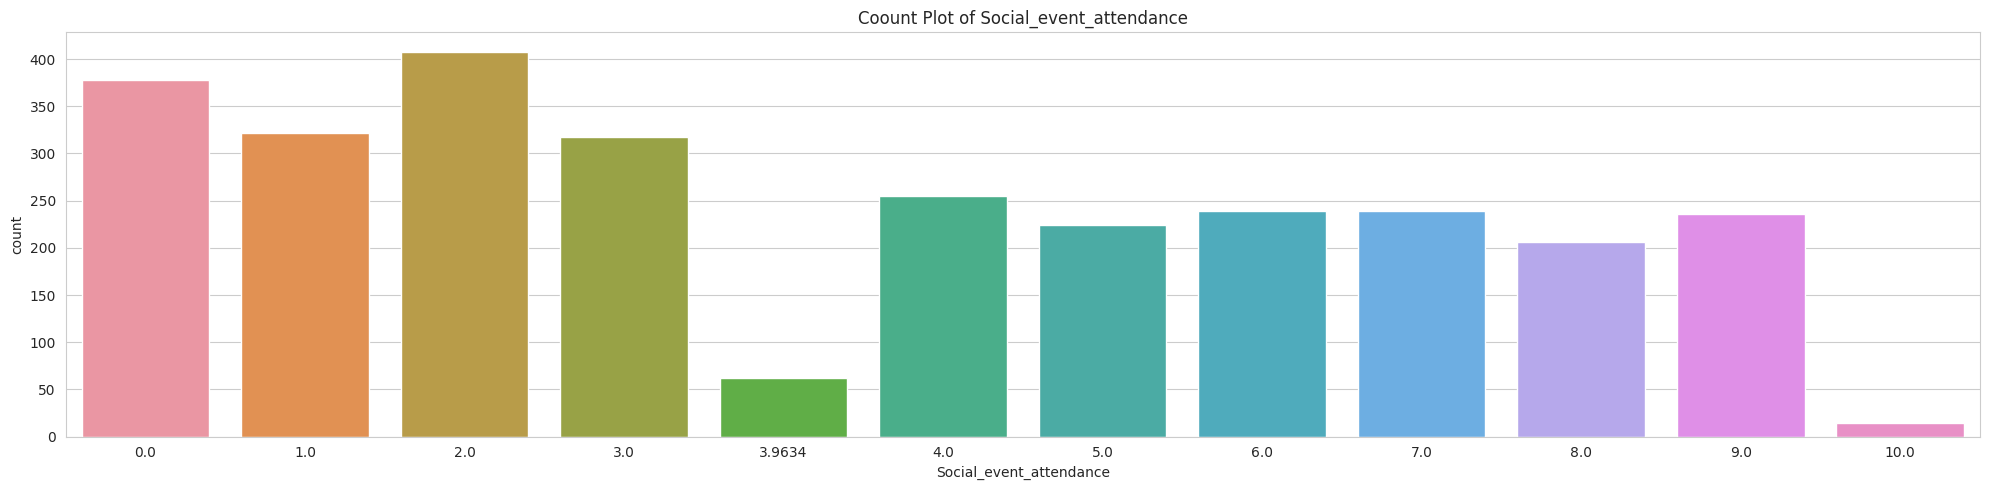

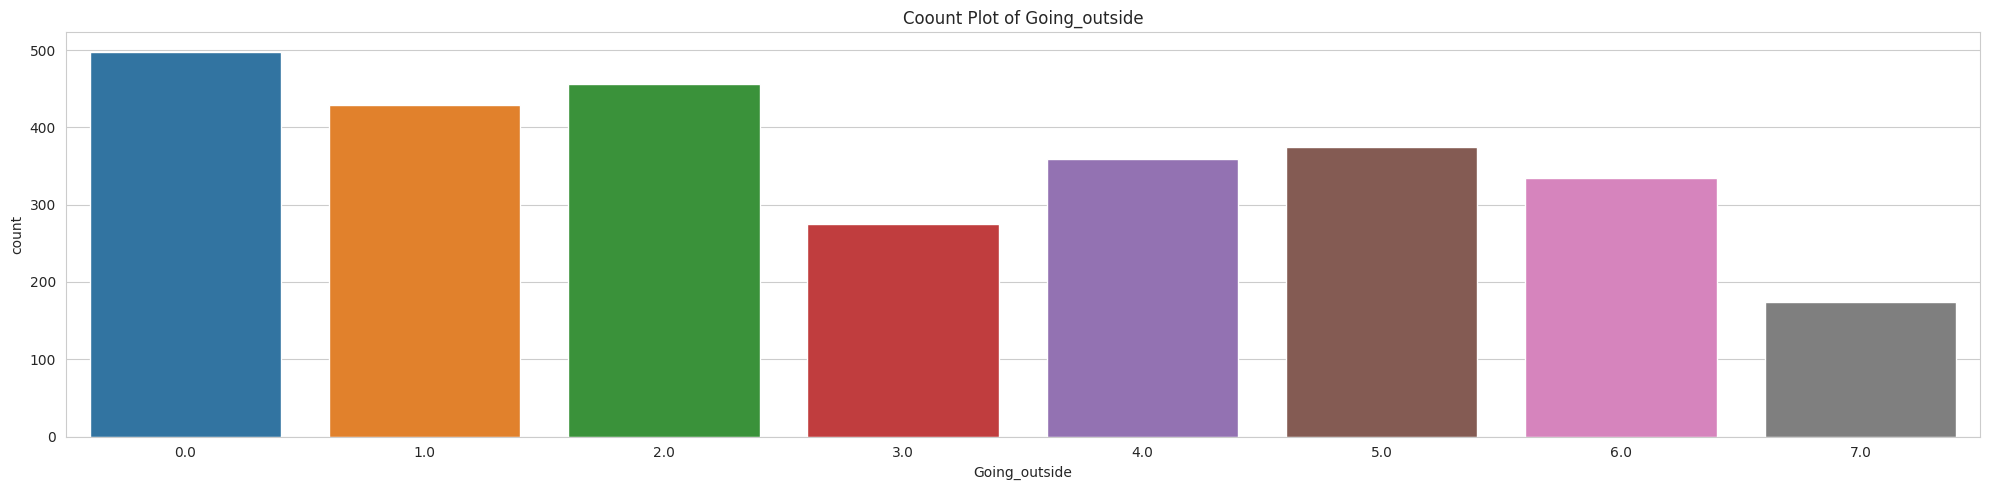

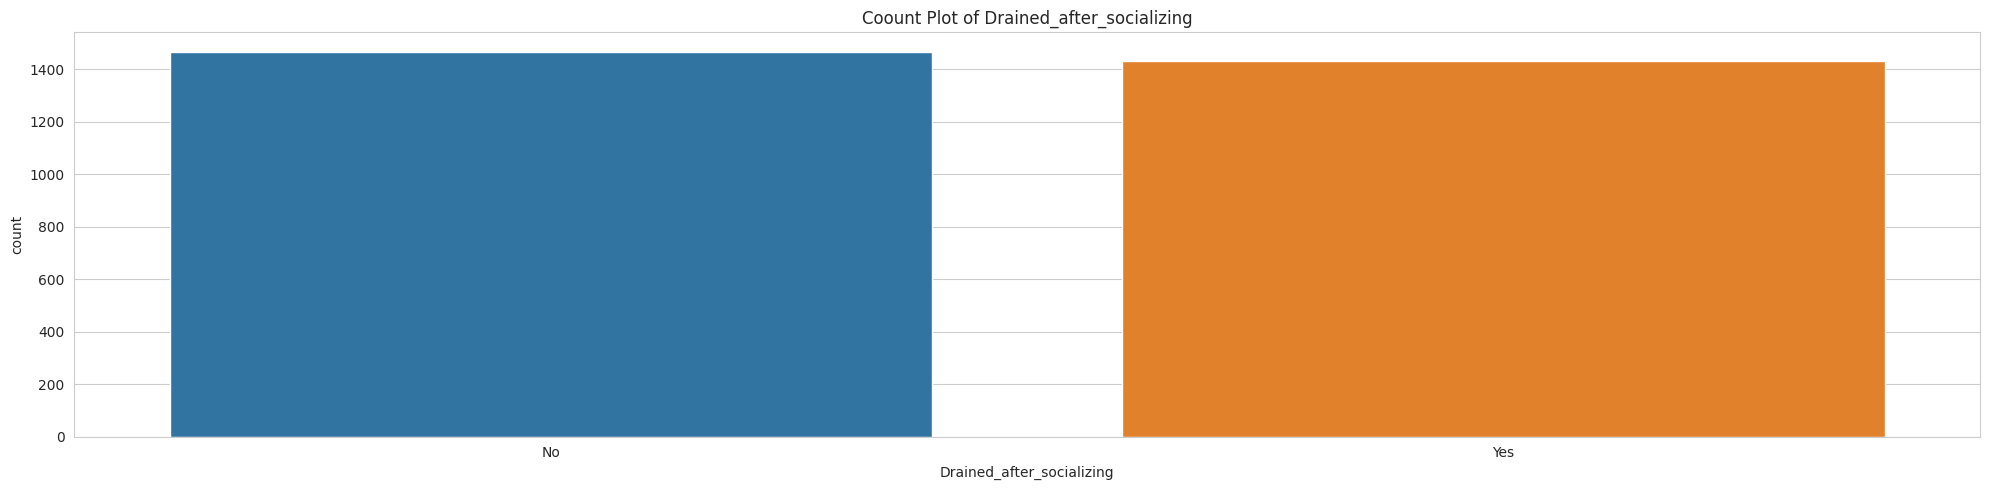

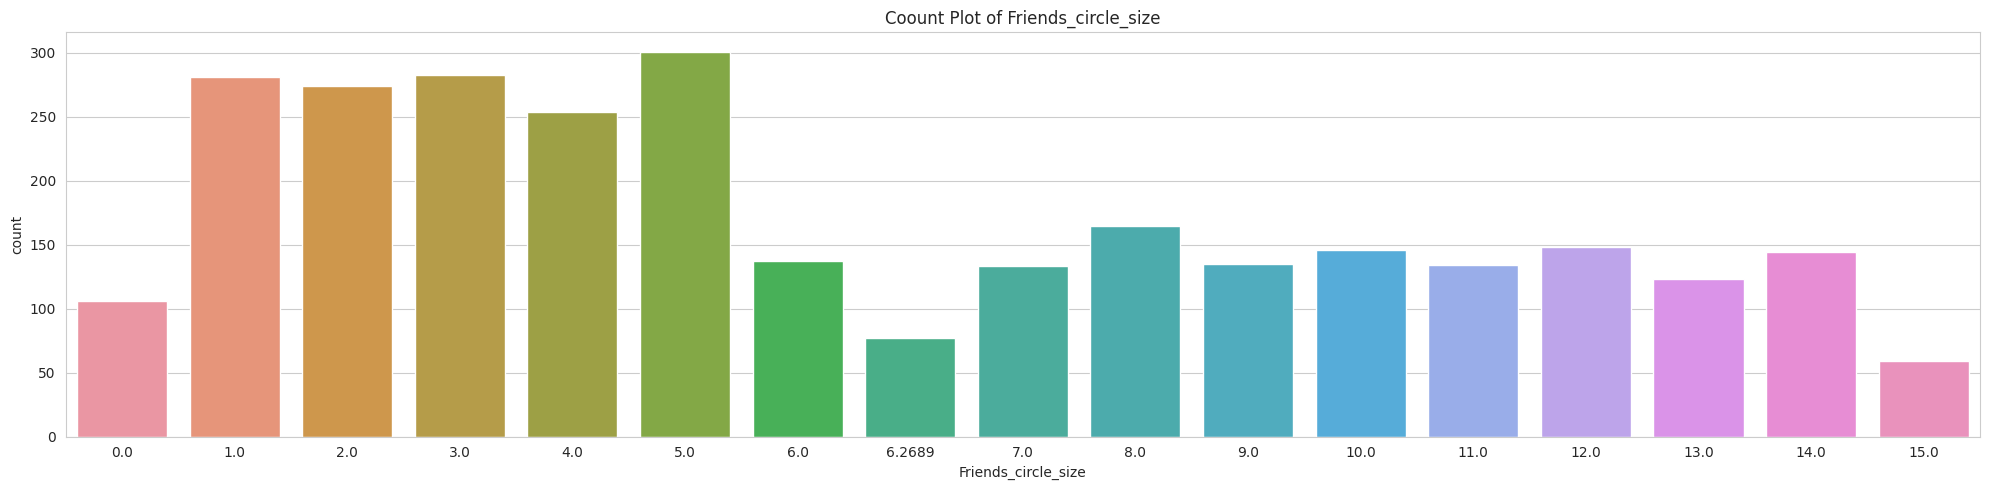

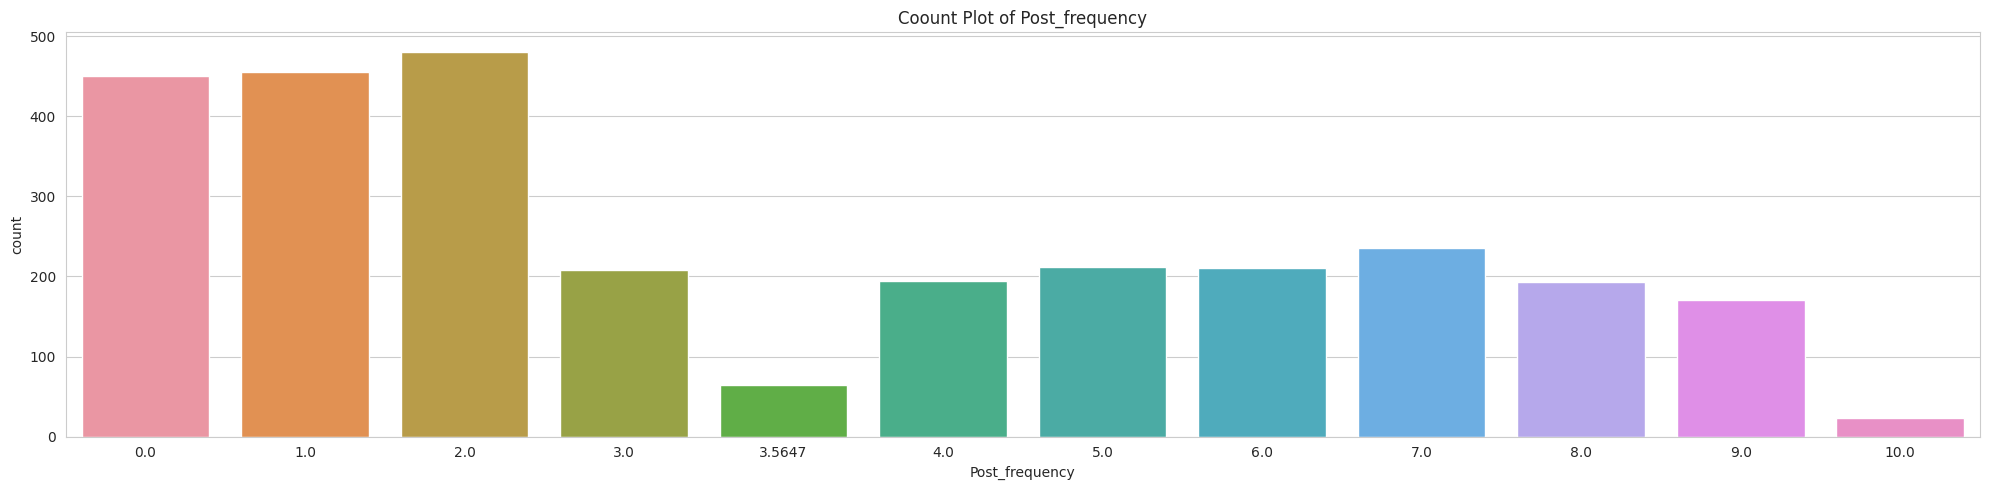

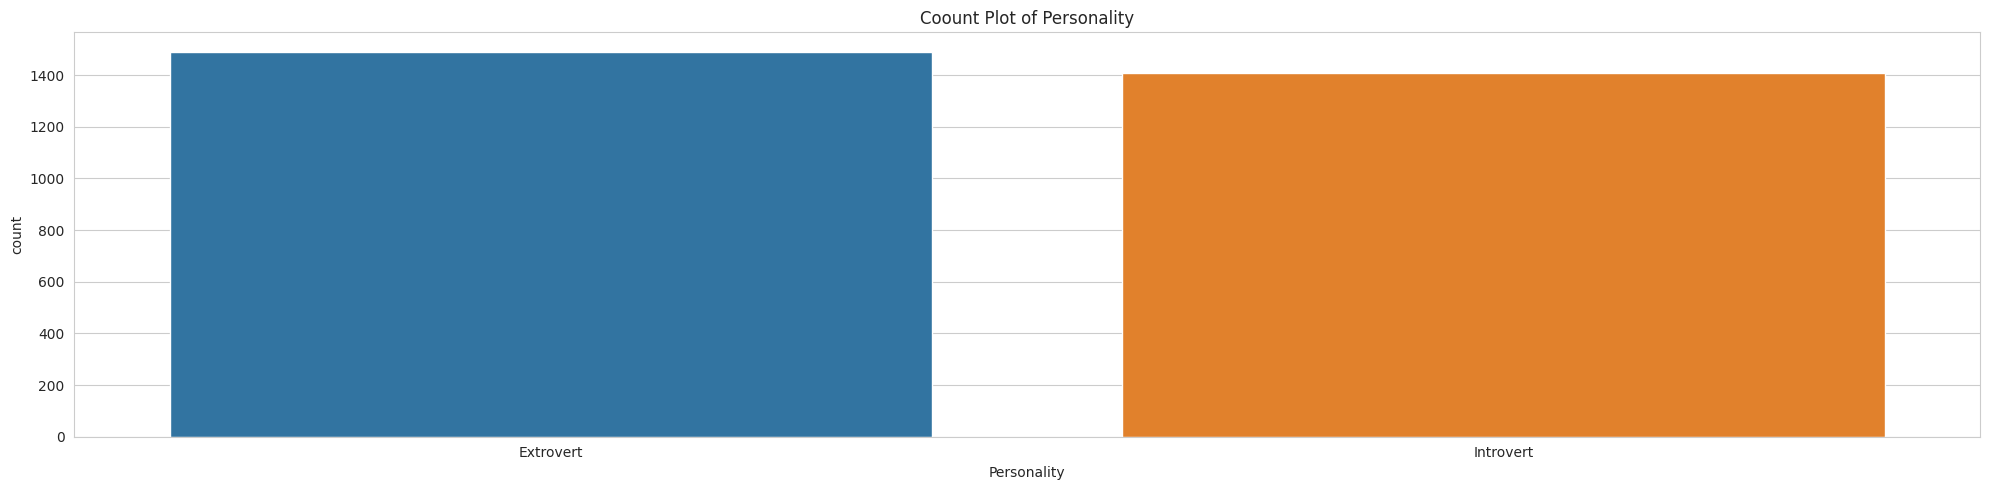

In [16]:
for features in cols:
    if features in data.columns:
        plt.figure(figsize=(20,5))
        sns.countplot(x=features,data = data)
        plt.title(f"Coount Plot of {features}")
        plt.tight_layout()
        plt.show()

# CORRELATION MATRIX

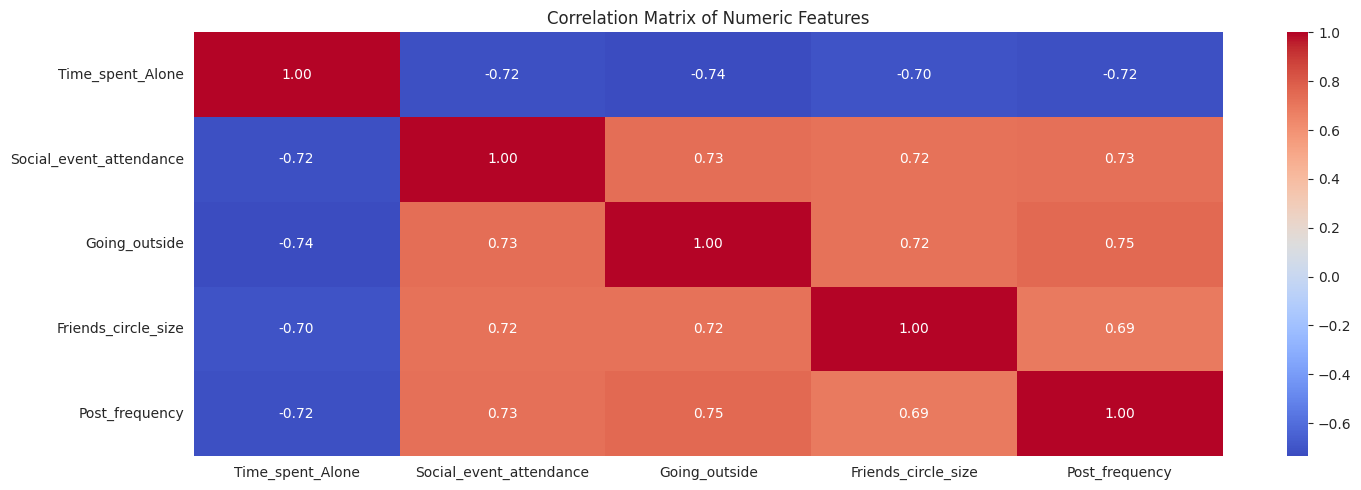

In [17]:
numeric_df = data.select_dtypes(include=[np.number])
if numeric_df.shape[1]>=4:
    plt.figure(figsize=(15,5))
    correlation_matrix = numeric_df.corr()
    sns.heatmap(correlation_matrix,annot=True,fmt='.2f',cmap='coolwarm')
    plt.title(f"Correlation Matrix of Numeric Features")
    plt.tight_layout()
    plt.show()

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2900 non-null   float64
 1   Stage_fear                 2900 non-null   object 
 2   Social_event_attendance    2900 non-null   float64
 3   Going_outside              2900 non-null   float64
 4   Drained_after_socializing  2900 non-null   object 
 5   Friends_circle_size        2900 non-null   float64
 6   Post_frequency             2900 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


# FEATURE ENGINEERING

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
lab_cols = ['Stage_fear','Drained_after_socializing','Personality']

In [21]:
le = LabelEncoder()

In [22]:
for column in lab_cols:
    data[column] = le.fit_transform(data[column])

In [23]:
data.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,0,4.0,6.0,0,13.0,5.0,0
1,9.0,1,0.0,0.0,1,0.0,3.0,1
2,9.0,1,1.0,2.0,1,5.0,2.0,1
3,0.0,0,6.0,7.0,0,14.0,8.0,0
4,3.0,0,9.0,4.0,0,8.0,5.0,0


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2900 non-null   float64
 1   Stage_fear                 2900 non-null   int64  
 2   Social_event_attendance    2900 non-null   float64
 3   Going_outside              2900 non-null   float64
 4   Drained_after_socializing  2900 non-null   int64  
 5   Friends_circle_size        2900 non-null   float64
 6   Post_frequency             2900 non-null   float64
 7   Personality                2900 non-null   int64  
dtypes: float64(5), int64(3)
memory usage: 181.4 KB


In [25]:
data.isna().sum()

Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64

# CORRELATION MATRIX AFTER FEATURE ENGINEERING

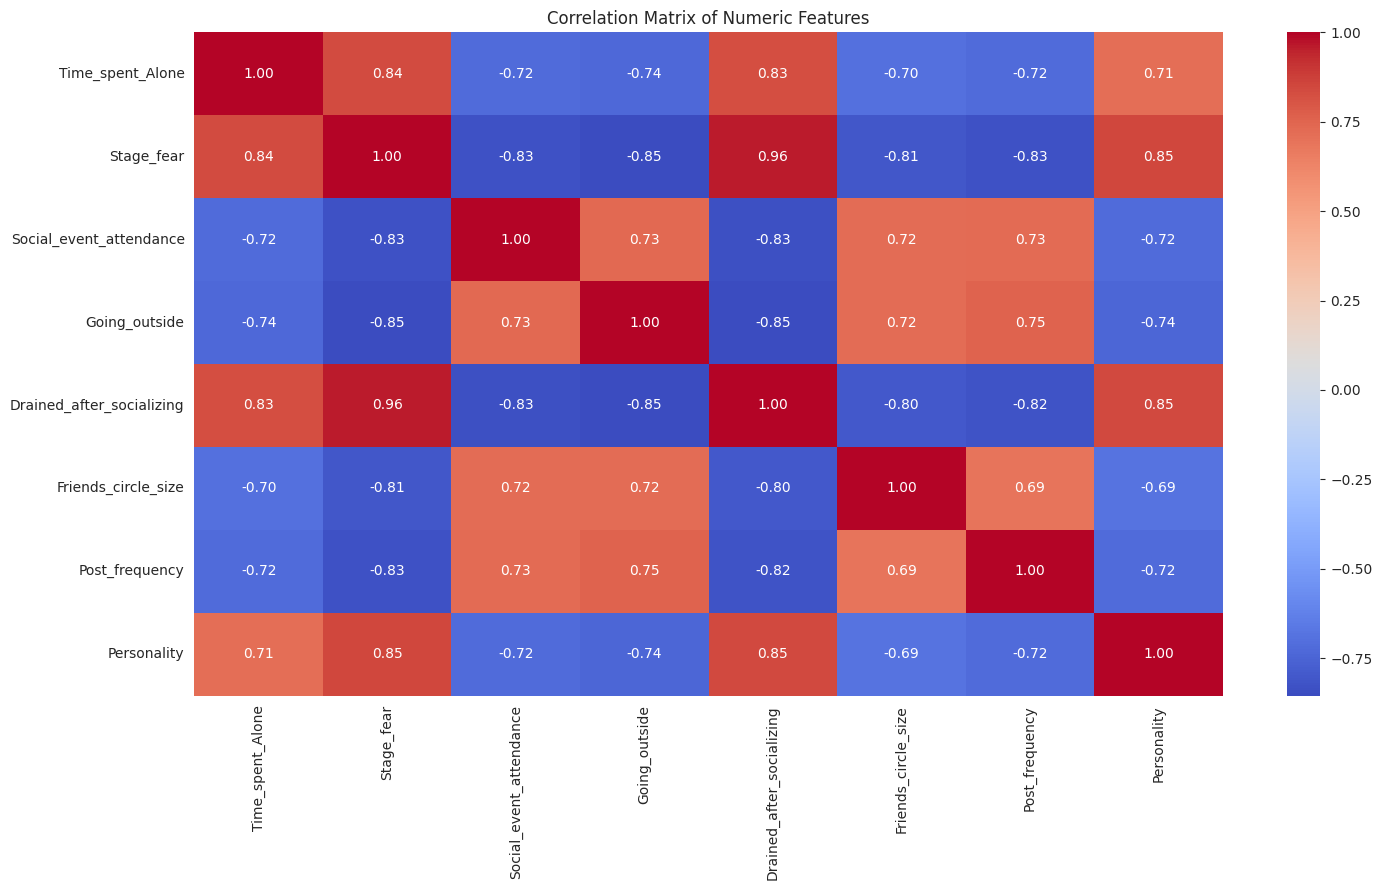

In [26]:
numeric_df1 = data.select_dtypes(include=[np.number])
if numeric_df1.shape[1]>=4:
    plt.figure(figsize=(15,9))
    correlation_matrix1  = numeric_df1.corr()
    sns.heatmap(correlation_matrix1,annot=True,cmap='coolwarm',fmt='.2f')
    plt.title(f'Correlation Matrix of Numeric Features')
    plt.tight_layout()
    plt.show()

# KDE PLOT

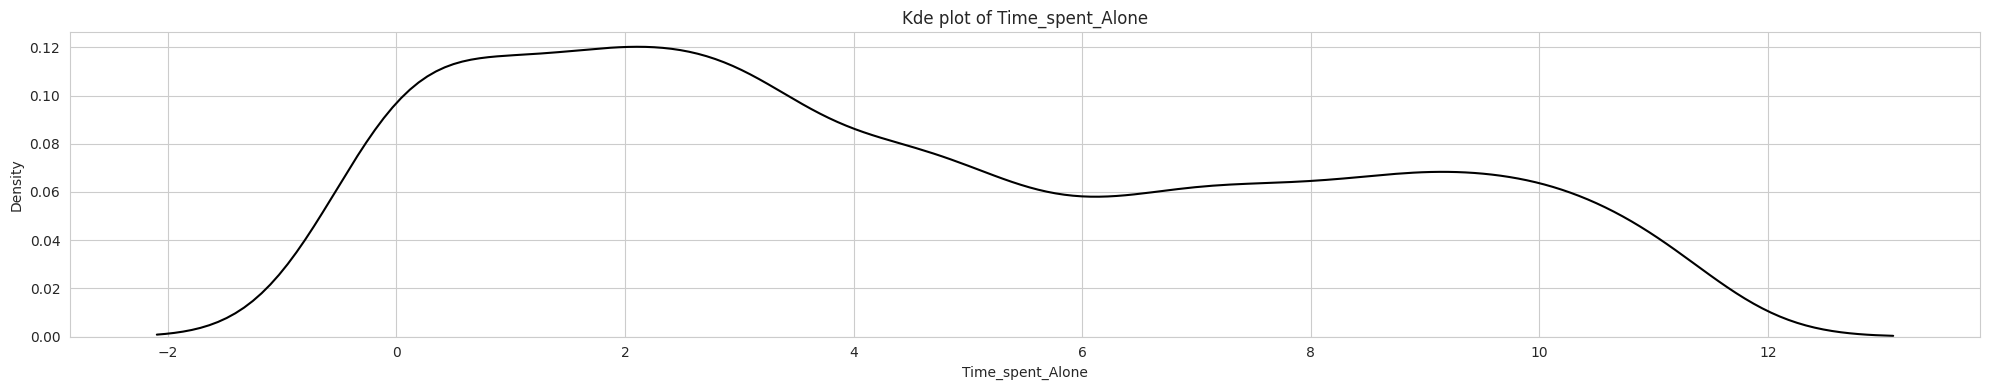

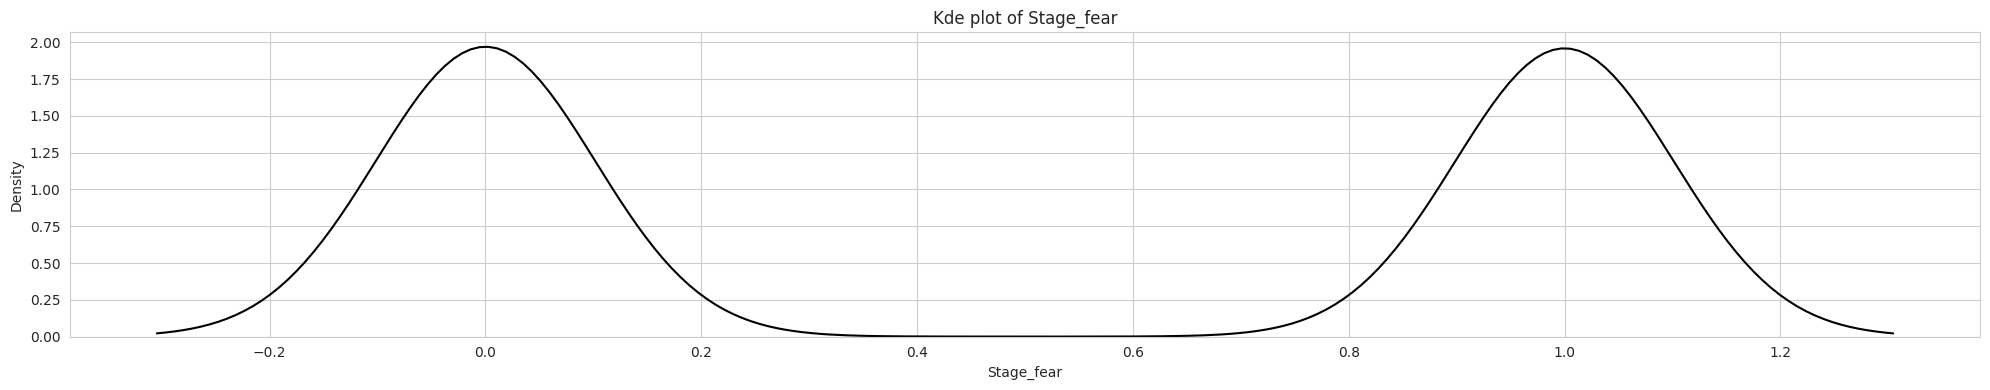

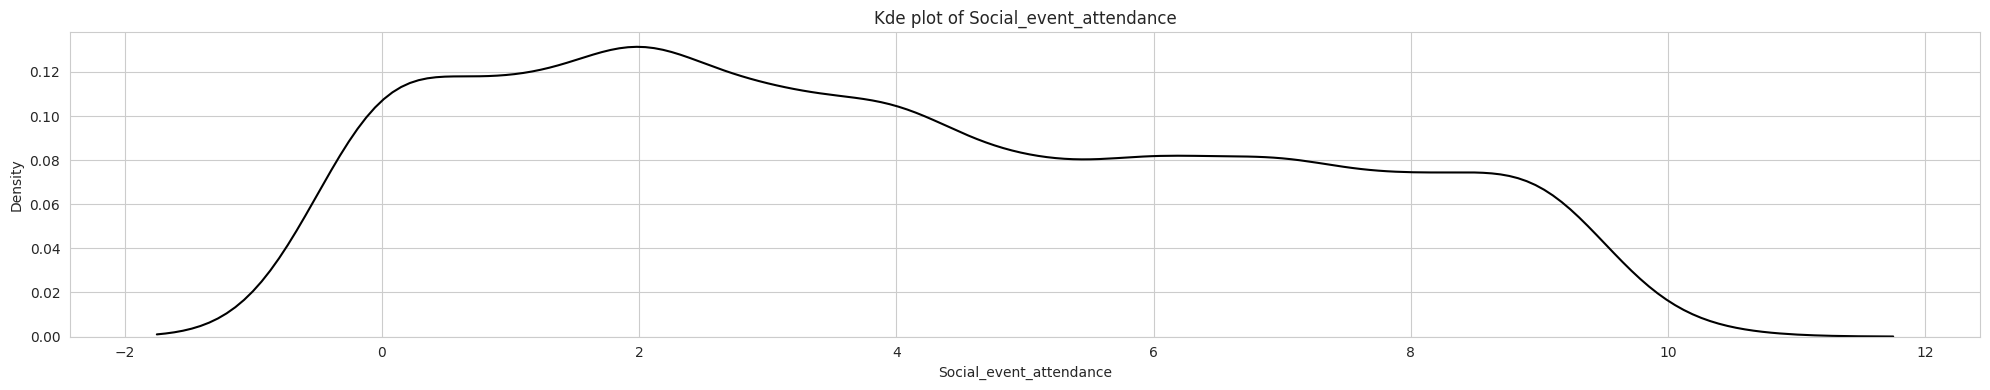

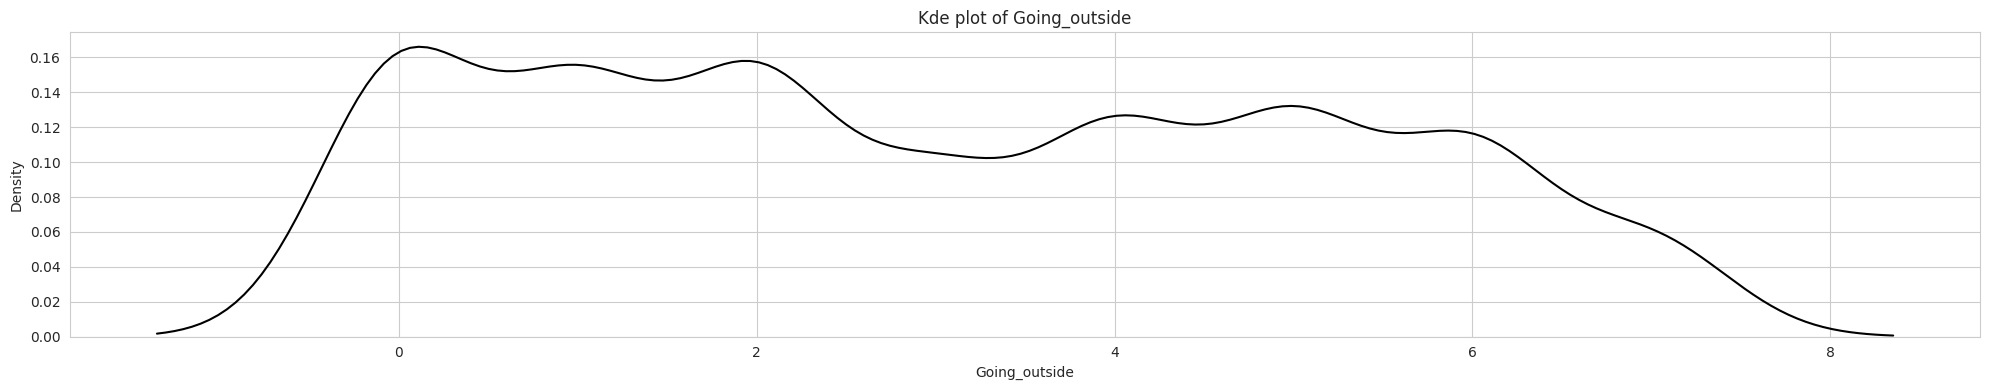

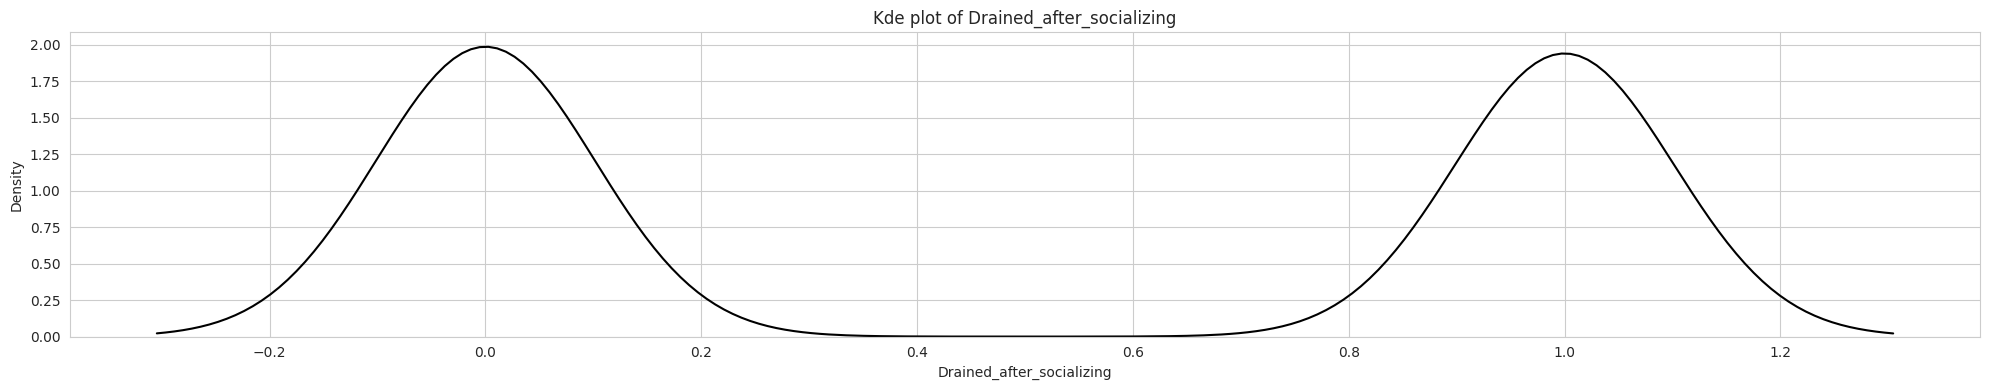

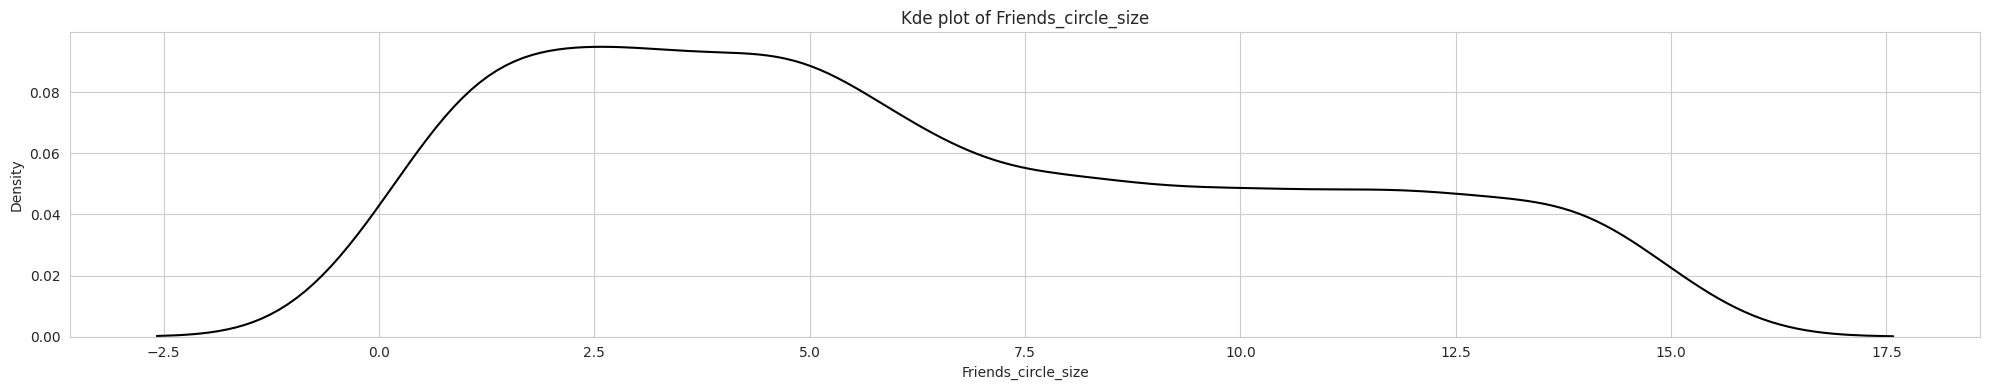

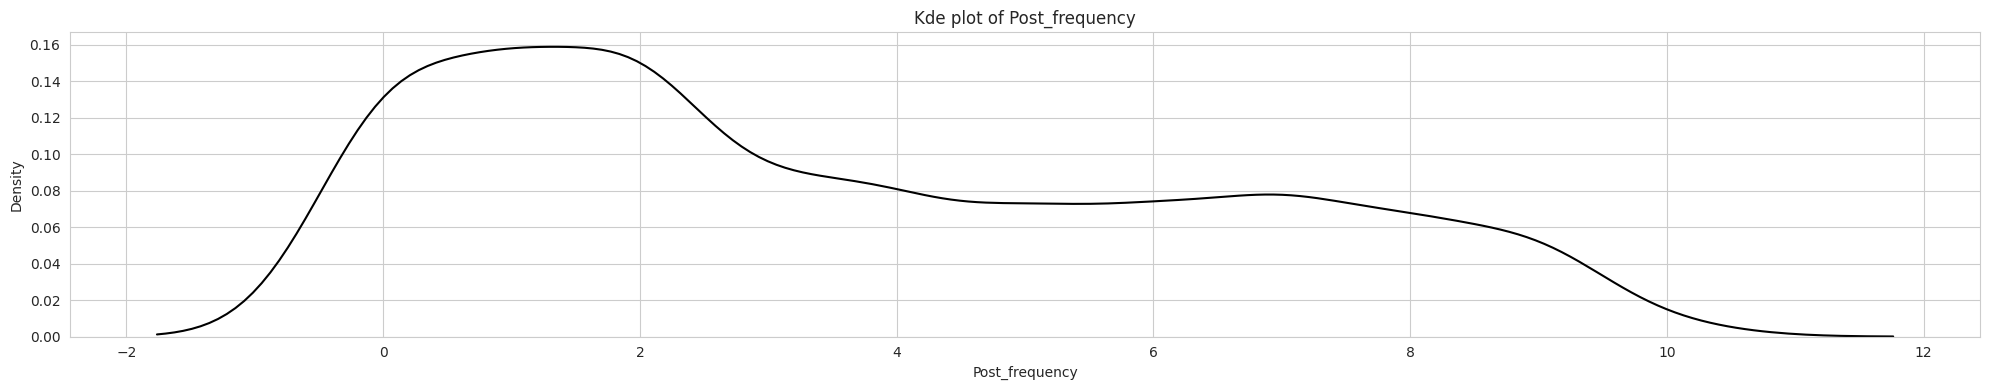

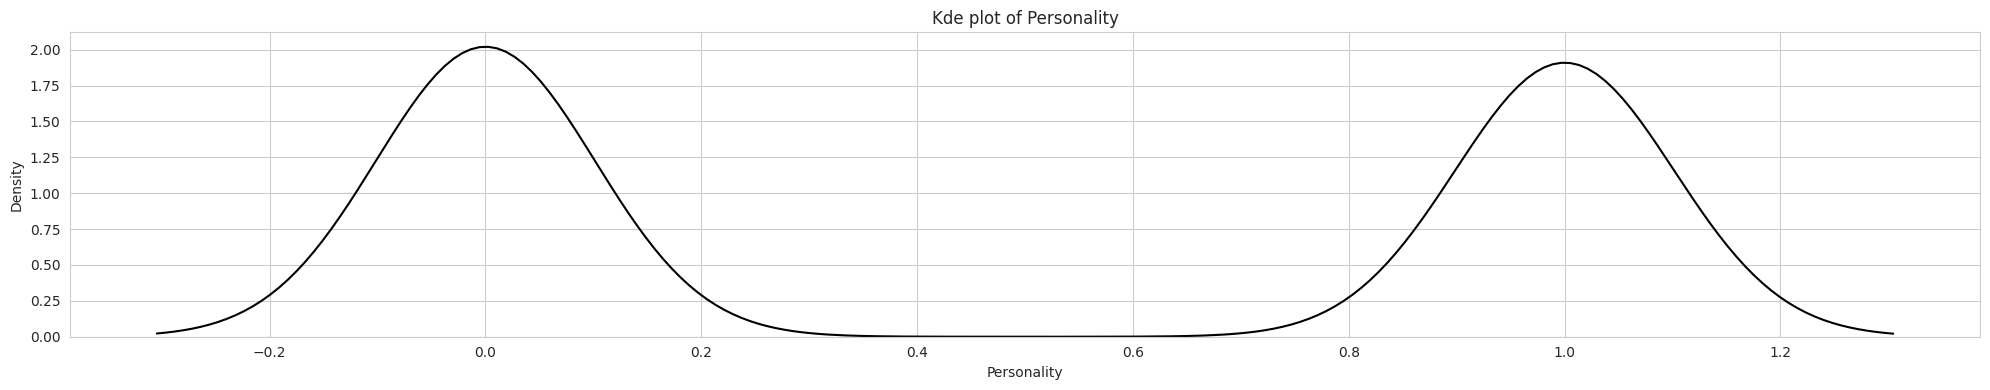

In [27]:
for features in cols:
    if features in data.columns:
        plt.figure(figsize=(20,4))
        sns.kdeplot(data[features].dropna(),color='black')
        plt.title(f"Kde plot of {features}")
        plt.tight_layout()
        plt.show()

# MODEL SECTION

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score

In [29]:
data.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,0,4.0,6.0,0,13.0,5.0,0
1,9.0,1,0.0,0.0,1,0.0,3.0,1
2,9.0,1,1.0,2.0,1,5.0,2.0,1
3,0.0,0,6.0,7.0,0,14.0,8.0,0
4,3.0,0,9.0,4.0,0,8.0,5.0,0


In [30]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier #KNeighbors

In [33]:
models = {
    "LogisticRegression": LogisticRegression(),
    "DecisionTree": DecisionTreeClassifier(),
    "RandomForest": RandomForestClassifier(),
    "SVC": SVC(),
    "KNeighbors": KNeighborsClassifier()
}

In [34]:
results = []

for name, model in models.items():
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test,y_pred)
    precison = precision_score(y_test,y_pred,average='weighted')
    recall = recall_score(y_test,y_pred,average='weighted')
    f1 = f1_score(y_test,y_pred,average='weighted')

    results.append({
        'Model':name,
        'Accuracy': round(acc,4),
        'Precision': round(precison,4),
        'Recall': round(recall,4),
        'F1 Score': round(f1,4)
    })

In [35]:
results_df = pd.DataFrame(results).sort_values(by='Accuracy',ascending=False)
print(results_df)

                Model  Accuracy  Precision  Recall  F1 Score
3                 SVC    0.9293     0.9296  0.9293    0.9293
0  LogisticRegression    0.9241     0.9243  0.9241    0.9242
2        RandomForest    0.9207     0.9209  0.9207    0.9207
4          KNeighbors    0.9207     0.9208  0.9207    0.9207
1        DecisionTree    0.8741     0.8743  0.8741    0.8742


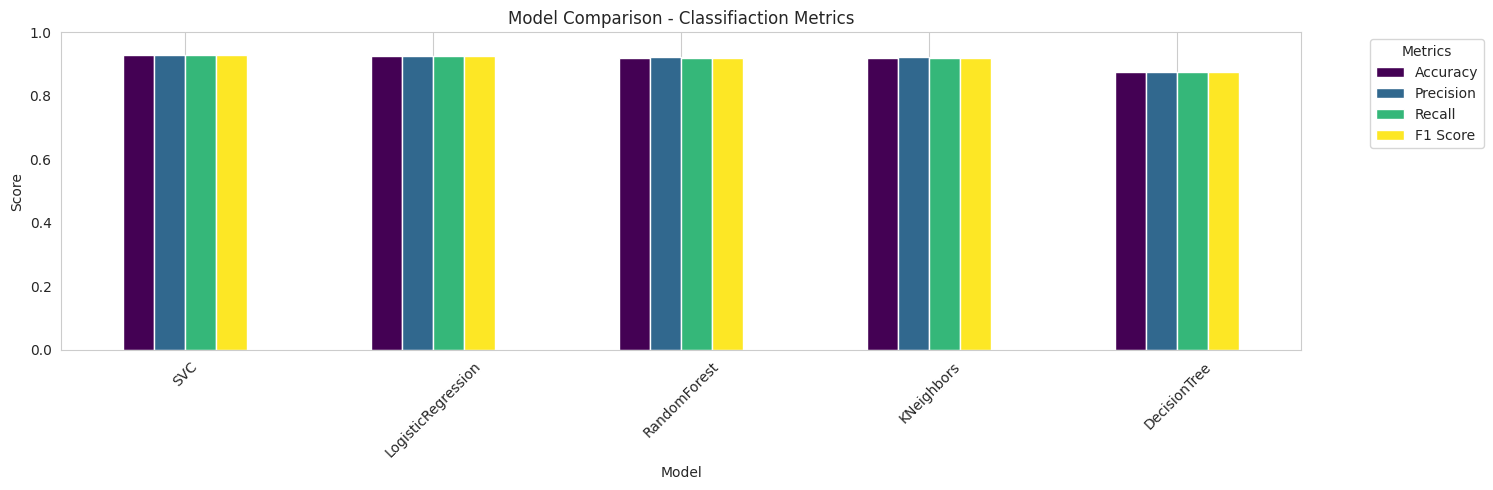

In [36]:
metrics = ['Accuracy','Precision','Recall','F1 Score']
df_plot = results_df.set_index('Model')[metrics]

# plt.figure(figsize=(20,5))
df_plot.plot(kind='bar',figsize=(15,5),colormap='viridis')

plt.title('Model Comparison - Classifiaction Metrics')
plt.ylabel('Score')
plt.ylim(0,1)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(title='Metrics',bbox_to_anchor=(1.05,1),loc='upper left')
plt.tight_layout()
plt.show()

# Coclusion 

> SVM Give the reults around ~93%.
>
> May be some more model give the better results.